<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/cluster_vinhos_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=35cc99950e6d51252e025fdf513721ed054e7643d402a32ea223312c5188bd4e
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [48]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [49]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/wines.csv')
base.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
x = base.iloc[:, 1:14].values
y = base.iloc[:, 0].values

In [51]:
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [52]:
#mapa auto organizável
som = MiniSom(x = 8, 
              y = 8, 
              input_len = 13, 
              sigma = 2.0, 
              learning_rate = 0.9,
              random_seed = 1)

som.random_weights_init(x);
som.train_random(data = x, num_iteration = 1000)

som._weights.shape

(8, 8, 13)

In [53]:
som._weights[0]

array([[0.61565888, 0.50914414, 0.57837712, 0.558616  , 0.37664079,
        0.23474736, 0.08892093, 0.63971043, 0.31705469, 0.62379127,
        0.16486794, 0.15416702, 0.32082525],
       [0.58749911, 0.52487883, 0.56961627, 0.54008838, 0.34663734,
        0.23138722, 0.08507109, 0.66736806, 0.25254548, 0.49045962,
        0.21435073, 0.181128  , 0.28969164],
       [0.54853112, 0.53067729, 0.56534214, 0.54315669, 0.30941295,
        0.25566722, 0.10307469, 0.71847753, 0.21569258, 0.3716225 ,
        0.26251061, 0.23107684, 0.24684197],
       [0.50601925, 0.51359748, 0.57013113, 0.56721286, 0.28010014,
        0.2784473 , 0.14298198, 0.77213235, 0.22603891, 0.31200484,
        0.29862709, 0.29874608, 0.21180381],
       [0.42830298, 0.43707945, 0.56867338, 0.5804492 , 0.25660081,
        0.28428313, 0.21114622, 0.79328036, 0.25353   , 0.24362898,
        0.35614471, 0.43429827, 0.16870157],
       [0.32677042, 0.31622753, 0.55636733, 0.61070193, 0.22622222,
        0.31238274, 0.28536

In [54]:
som._activation_map

array([[0.9947059 , 1.00010028, 1.00947628, 1.00414749, 0.98207755,
        0.95751475, 0.93788233, 0.88861573],
       [1.00982489, 1.01262398, 1.01486933, 1.00515617, 0.9573764 ,
        0.90482125, 0.90045699, 0.86788667],
       [1.03427138, 1.0498254 , 1.03551234, 0.99731509, 0.89887038,
        0.84931734, 0.86728784, 0.83060451],
       [1.00125601, 1.03024804, 1.02006251, 0.94133408, 0.78263294,
        0.76242725, 0.78154722, 0.74373021],
       [0.90378528, 0.89854938, 0.88967548, 0.77538233, 0.59936357,
        0.59692832, 0.64112028, 0.64182014],
       [0.74908495, 0.66983761, 0.58966705, 0.49067681, 0.39852586,
        0.39560765, 0.46184488, 0.48663174],
       [0.56420593, 0.45953709, 0.33787021, 0.27610384, 0.27706611,
        0.33818756, 0.40530169, 0.42975694],
       [0.46431613, 0.34420771, 0.26176696, 0.25985719, 0.28883621,
        0.35643948, 0.40512767, 0.43031408]])

In [55]:
q = som.activation_response(x)
q

array([[13.,  6.,  5.,  4.,  0.,  6.,  4.,  4.],
       [ 7.,  3.,  0.,  1.,  1.,  2.,  2.,  3.],
       [ 1.,  1.,  1.,  1.,  4.,  5.,  5.,  3.],
       [ 2.,  1.,  1.,  0.,  0.,  5.,  1.,  1.],
       [ 5.,  0.,  4.,  1.,  0.,  4.,  1.,  3.],
       [ 1.,  1.,  0.,  2.,  4.,  5.,  1.,  1.],
       [ 2.,  1.,  3.,  0.,  5.,  3.,  1.,  4.],
       [ 5.,  0.,  4.,  4.,  6.,  7.,  1.,  6.]])

In [56]:
from pylab import pcolor, colorbar, plot

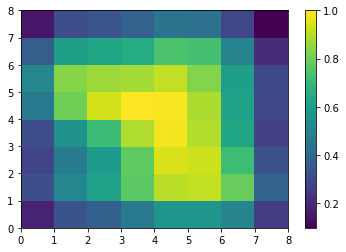

In [57]:
pcolor(som.distance_map().T) #MID - mean inter neuron distance
colorbar()

In [58]:
w = som.winner(x[3])
w

(7, 5)

In [59]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

In [60]:
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

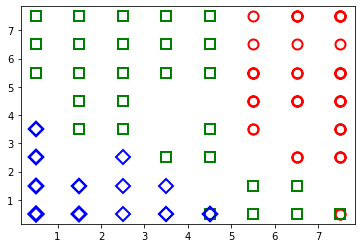

In [62]:
for i, a in enumerate(x):
  #print(i)
  #print(x)
  w = som.winner(a);
  #print(w)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = color[y[i]],
       markeredgewidth = 2)